In [1]:
from cProfile import label
from email import header
from ntpath import join
from os import sep
from statistics import mean, median, variance
from tkinter.ttk import Separator
from xml.etree.ElementPath import xpath_tokenizer
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
import numpy as np
import seaborn as sns
from scipy.signal import find_peaks
import pingouin as pg
from pingouin import homoscedasticity
from mpl_toolkits.mplot3d import Axes3D
import os

C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
#data, we would like to evaluate
healthy=['ZM001_b_data','ZM002_b_data','ZM004_b_data']
paralyzed=['SM001_bal_data','SM002_bal_data','SM003_bal_data','SM005_bal_data']
points=[22,23,3]#pro levou stranu paralyzovanou 1,14,26

# Get the list of all files and directories
path = r'C:\Users\kuba8\MATLAB Drive\projekt oblicej\dataPython'
dir_list = os.listdir(path)
names=[]
for folder in dir_list:
    folder = folder.replace(' ', '')[:-4]
    if folder[-1]!='w':
        names.append(folder)
names=names[1:]
print(names)

#names=['ZM001_b_data','ZM002_b_data','ZM003_b_data','ZM004_b_data','ZM005_b_data','SM001_bal_data','SM003_bal_data','SM005_bal_data','SM008_bal_data', 'SM009_bal_data']
names=['ZM001_b_data','ZM002_b_data','ZM003_b_data','ZM004_b_data','ZM005_b_data','SM020_bar_data','SM021_bar_data','SM022_bar_data','SM023_bar_data', 'SM024_bar_data']

['SF006_bar_data', 'SF007_bar_data', 'SF010_bar_data', 'SF011_bar_data', 'SM001_bal_data', 'SM002_bal_data', 'SM003_bal_data', 'SM004_bal_data', 'SM005_bal_data', 'SM008_bal_data', 'SM009_bal_data', 'SM020_bar_data', 'SM021_bar_data', 'SM022_bar_data', 'SM023_bar_data', 'SM024_bar_data', 'ZF006_b_data', 'ZF007_b_data', 'ZF010_b_data', 'ZF011_b_data', 'ZM001_b_data', 'ZM002_b_data', 'ZM003_b_data', 'ZM004_b_data', 'ZM005_b_data', 'ZM008_b_data', 'ZM009_b_data', 'ZM852_b_data', 'ZM999_b_data']


In [3]:
#function which select peaks in signal and set borders for next calculation
def select2(x,rel_hig, wid,dis,a,b,promin=0):

    #initial gues of promminence
    if promin==0:
        promin=(max(x[a:b])-mean(x[a:b]))*0.5

    #function for searching peaks
    peaks, properties = find_peaks(-x[a:b], prominence=promin, rel_height=rel_hig, width=wid, distance=dis)

    #repeat, if number of peaks is bigger than 6
    if len(peaks)>6:
        promin=promin+0.002/20
        peaks,properties=select2(x, rel_hig, wid,dis,a,b,promin)
    properties["prominences"], properties["widths"]

    #returns borders of peaks(properties) and order index of peaks
    return peaks, properties

In [4]:
#function for testing equality of means
def process(data,num,num2):

    #select specific points in signal
    peak1,prop1=select2(data[num],0.8,1,5.5,0,len(data))

    #widen area of peaks
    p=2
    x=np.array([])

    #make signal composed from exercises
    for j in range(0,len(peak1)):
        xpo=data[num2][round(prop1['left_ips'][j])-p:round(prop1['right_ips'][j])+p]
        x=np.append(x,xpo)
    return x

In [5]:
index=np.array([])
pl_val=pd.DataFrame([])
big_table=pd.DataFrame([])
for l,val in enumerate(points):
    dataset=pd.DataFrame([])   
    for k in range(0,len(names)):
        #load data
        data=pd.read_csv(join(r'C:\Users\kuba8\MATLAB Drive\projekt oblicej\dataPython',names[k]+'.txt'),sep=' ',header=None)
        data=data.transpose()
        #data=normalize(data)

        #get specific area of peaks
        data=process(data,25,val)
        if l==0:
            value=mean(data)
        else:
            value=mean(data)#variance
        df = pd.DataFrame({'value':[value], 'label': names[k],'point_index': val,'status':names[k][0]})#random.choices(data,k=20)})
        dataset=pd.concat([dataset,df], axis=0,ignore_index=True)
    
    pl_val=pd.concat([pl_val,dataset], axis=0,ignore_index=True)

In [6]:
pl_val

,value,label,point_index,status
0,0.074478,ZM001_b_data,22,Z
1,0.074046,ZM002_b_data,22,Z
2,0.074649,ZM003_b_data,22,Z
3,0.076533,ZM004_b_data,22,Z
4,0.074958,ZM005_b_data,22,Z
5,0.075541,SM020_bar_data,22,S
6,0.075129,SM021_bar_data,22,S
7,0.075354,SM022_bar_data,22,S
8,0.075639,SM023_bar_data,22,S
9,0.075638,SM024_bar_data,22,S


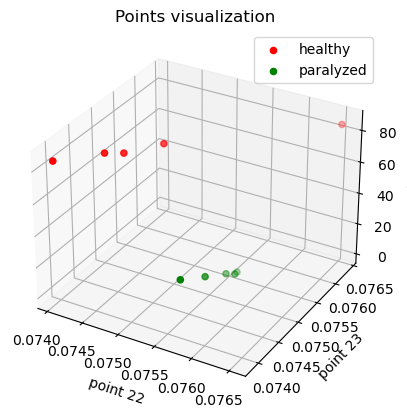

In [7]:
#%matplotlib widget
fig = plt.figure()
#ax = Axes3D(fig)

ax = fig.add_subplot(projection='3d')
ax.set_title("Points visualization")
ax.set_xlabel(f'point {points[0]}')
ax.set_ylabel(f'point {points[1]}')
ax.set_zlabel(f'point {points[2]}')
ax.scatter(pl_val.query("status == 'Z' and point_index == @points[0]")['value'],pl_val.query("status == 'Z' and point_index == @points[1]")['value'],pl_val.query("status == 'Z' and point_index == @points[2]")['value'],color='red',label='healthy')
ax.scatter(pl_val.query("status == 'S' and point_index == @points[0]")['value'],pl_val.query("status == 'S' and point_index == @points[1]")['value'],pl_val.query("status == 'S' and point_index == @points[2]")['value'],color='green',label='paralyzed')
ax.legend()

In [8]:
pl_val.query("status == 'Z' and point_index == @points[0] ")['value']

0    0.074478
1    0.074046
2    0.074649
3    0.076533
4    0.074958
Name: value, dtype: float64

Text(0, 0.5, 'pair 3')

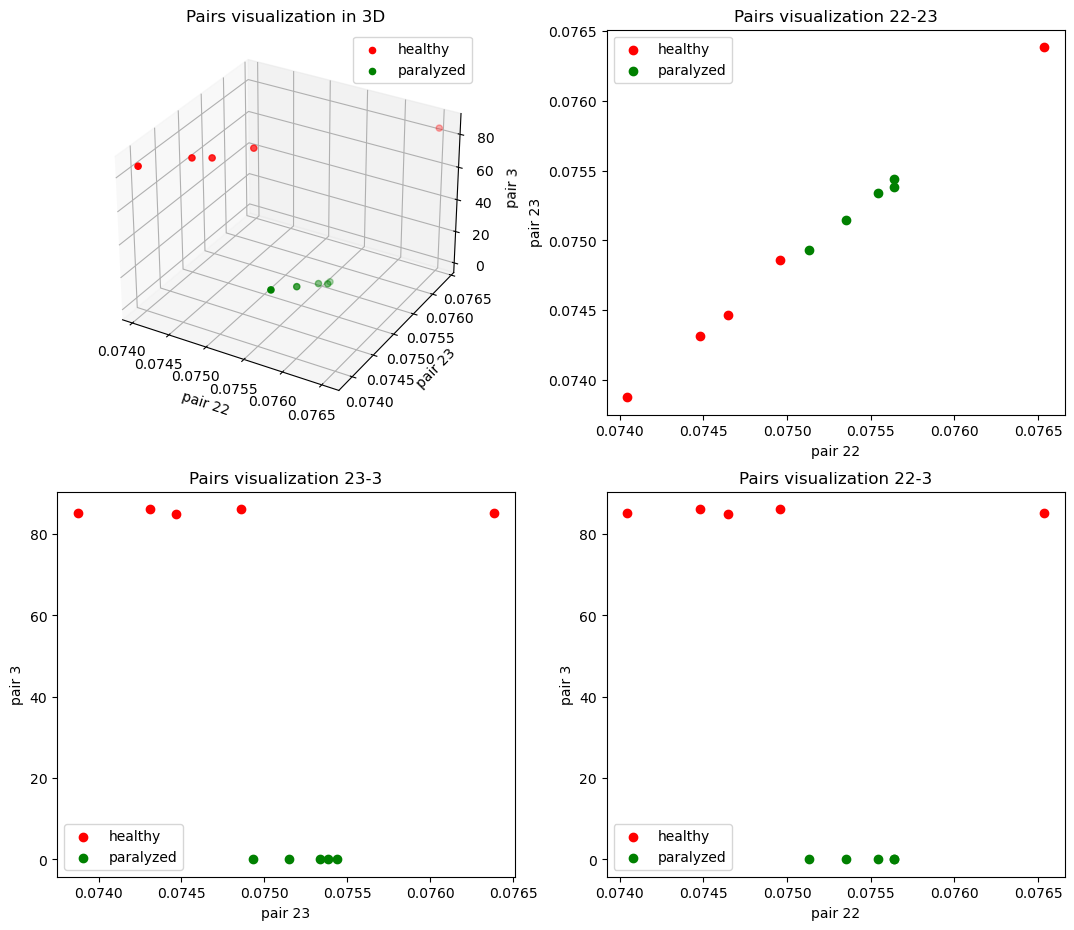

In [9]:
fig = plt.figure()
fig.set_figwidth(13)
fig.set_figheight(11)

axs1 = fig.add_subplot(2, 2, 1, projection='3d')
axs1.set_title("Pairs visualization in 3D")
axs1.set_xlabel(f'pair {points[0]}')
axs1.set_ylabel(f'pair {points[1]}')
axs1.set_zlabel(f'pair {points[2]}')
axs1.scatter(pl_val[(pl_val['status'] == 'Z') & (pl_val['point_index']==points[0])]['value'],pl_val[(pl_val['status'] == 'Z') & (pl_val['point_index']==points[1])]['value'],pl_val[(pl_val['status'] == 'Z') & (pl_val['point_index']==points[2])]['value'],color='red',label='healthy')
axs1.scatter(pl_val[(pl_val['status'] == 'S') & (pl_val['point_index']==points[0])]['value'],pl_val[(pl_val['status'] == 'S') & (pl_val['point_index']==points[1])]['value'],pl_val[(pl_val['status'] == 'S') & (pl_val['point_index']==points[2])]['value'],color='green',label='paralyzed')
axs1.legend()

axs2 = fig.add_subplot(2, 2, 2)
axs2.scatter(pl_val[(pl_val['status'] == 'Z') & (pl_val['point_index']==points[0])]['value'],pl_val[(pl_val['status'] == 'Z') & (pl_val['point_index']==points[1])]['value'],color='red',label='healthy')
axs2.scatter(pl_val[(pl_val['status'] == 'S') & (pl_val['point_index']==points[0])]['value'],pl_val[(pl_val['status'] == 'S') & (pl_val['point_index']==points[1])]['value'],color='green',label='paralyzed')
axs2.legend()
axs2.set_title(f'Pairs visualization {points[0]}-{points[1]}')
axs2.set_xlabel(f'pair {points[0]}')
axs2.set_ylabel(f'pair {points[1]}')

axs3 = fig.add_subplot(2, 2, 3)
axs3.scatter(pl_val[(pl_val['status'] == 'Z') & (pl_val['point_index']==points[1])]['value'],pl_val[(pl_val['status'] == 'Z') & (pl_val['point_index']==points[2])]['value'],color='red',label='healthy')
axs3.scatter(pl_val[(pl_val['status'] == 'S') & (pl_val['point_index']==points[1])]['value'],pl_val[(pl_val['status'] == 'S') & (pl_val['point_index']==points[2])]['value'],color='green',label='paralyzed')
axs3.legend()
axs3.set_title(f'Pairs visualization {points[1]}-{points[2]}')
axs3.set_xlabel(f'pair {points[1]}')
axs3.set_ylabel(f'pair {points[2]}')

axs4 = fig.add_subplot(2, 2, 4)
axs4.scatter(pl_val[(pl_val['status'] == 'Z') & (pl_val['point_index']==points[0])]['value'],pl_val[(pl_val['status'] == 'Z') & (pl_val['point_index']==points[2])]['value'],color='red',label='healthy')
axs4.scatter(pl_val[(pl_val['status'] == 'S') & (pl_val['point_index']==points[0])]['value'],pl_val[(pl_val['status'] == 'S') & (pl_val['point_index']==points[2])]['value'],color='green',label='paralyzed')
axs4.legend()
axs4.set_title(f'Pairs visualization {points[0]}-{points[2]}')
axs4.set_xlabel(f'pair {points[0]}')
axs4.set_ylabel(f'pair {points[2]}')


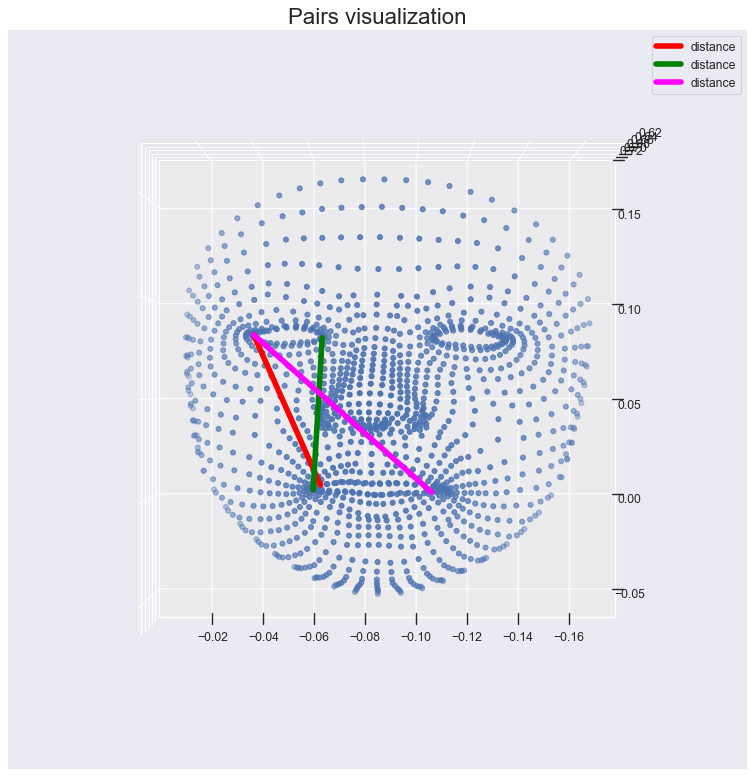

In [10]:
#visualization of used pairs
import seaborn as sns

name='ZM004_b'
data=loadmat(join(r'C:\Users\kuba8\MATLAB Drive\projekt oblicej\datapropouziti',name,name+'_coordinates',name+'_coordinates_'+str(8)))
df=pd.DataFrame(data['model'].transpose())

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(16, 12), dpi=80)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df[0], df[1], df[2])

def pair(a,b,col,label):
    x=[df[0][a-1],df[0][b-1]]
    y=[df[1][a-1],df[1][b-1]]
    z=[df[2][a-1],df[2][b-1]]
    ax.plot(x,y,z,color=col,linewidth=5,label=label) 

## for left side
#first pair 1
#pair(1122,1141,'red','angle')

#second pair 14
#pair(1116,1124,'green','distance')

#third pair 14
#pair(1076,1122,'magenta','distance')

## for right side
#first pair 1
pair(1072,1142,'red','distance')

#second pair 14
pair(1099,1140,'green','distance')

#third pair 14
pair(1072,1124,'magenta','distance')


ax.set_title('Pairs visualization',fontsize=20)
ax.legend()
ax.view_init(-90, 90)